In [1]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# upload zip file containing data
from google.colab import files
uploaded = files.upload()

Saving smoke_detection.zip to smoke_detection.zip


In [3]:
import zipfile

# unzip file
zip_ref = "/content/smoke_detection.zip"
zip_ref = zipfile.ZipFile(zip_ref, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# path to unzipped file
path = "/tmp/smoke_detection_iot.csv"

#create dataframe
df = pd.read_csv(path)

df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
# use columns Temperature through CNT as features
X = df.loc[:,'Temperature[C]':'CNT']

# drop any potential null values
X = X.dropna()

X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [6]:
from sklearn.preprocessing import StandardScaler

# normalize data to optimize model fit
data_scaler = StandardScaler()

X = data_scaler.fit_transform(X)

X

array([[ 0.28062169,  0.99494707, -0.24861434, ..., -0.09192422,
        -0.07388861, -1.38347572],
       [ 0.2816663 ,  0.91711549, -0.24861434, ..., -0.09192422,
        -0.07388861, -1.38334411],
       [ 0.28264127,  0.83702792, -0.24861434, ..., -0.09192422,
        -0.07388861, -1.38321249],
       ...,
       [ 0.20171901, -3.68848353, -0.16834834, ..., -0.09164563,
        -0.07387569, -0.62786328],
       [ 0.21676136, -3.66592365, -0.16694016, ..., -0.09164834,
        -0.07387569, -0.62773167],
       [ 0.23180371, -3.61177995, -0.16630008, ..., -0.09165014,
        -0.07387569, -0.62760005]])

In [7]:
# normalized data such that mean is 0 and standard deviation is 1
print(np.mean(X[:,0]))
print(np.std(X[:,0]))

-5.808684028567321e-17
1.0


In [8]:
# drop null values and convert pandas series into numpy array
y = df['Fire Alarm'].dropna().values

In [9]:
# split data between train and test; use stratify argument to balance classes
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [10]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

46972
15658
46972
15658


In [11]:
# liblinear used because the training data is a relatively large sample
model = LogisticRegression(solver='liblinear', max_iter= 200)

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [12]:
pred

array([0, 0, 1, ..., 1, 1, 1])

In [13]:
y_test

array([0, 0, 1, ..., 1, 1, 1])

In [14]:
# creat confusion matrix; results are excellent
conf_m = metrics.confusion_matrix(y_test, pred)

conf_m

array([[ 4403,    65],
       [   61, 11129]])

In [16]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = ['no fire', 'fire'])

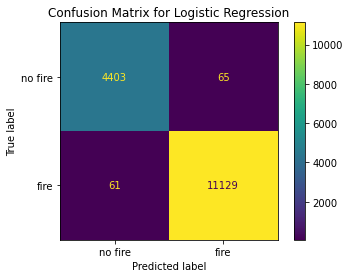

In [18]:
# visualize confusion matrix
cm_display.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [26]:
# create classification report; f1-scores are excellent
from sklearn.metrics import classification_report

target_names = ['no fire', 'fire']

report_as_str = classification_report(y_test, pred, target_names= target_names)

print(report_as_str)

              precision    recall  f1-score   support

     no fire       0.99      0.99      0.99      4468
        fire       0.99      0.99      0.99     11190

    accuracy                           0.99     15658
   macro avg       0.99      0.99      0.99     15658
weighted avg       0.99      0.99      0.99     15658



In [20]:
# accuracy is 99.2%; ideally we would aim for 99.9% 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9919529952739814


In [28]:
# create classification report as a dictionary 
report_as_dict = classification_report(y_test, pred, target_names= target_names, output_dict=True)

# create pandas dataframe from dictionary
results_df = pd.DataFrame(report_as_dict)

results_df

,no fire,fire,accuracy,macro avg,weighted avg
precision,0.986335,0.994193,0.991953,0.990264,0.991951
recall,0.985452,0.994549,0.991953,0.990000,0.991953
f1-score,0.985893,0.994371,0.991953,0.990132,0.991952
support,4468.000000,11190.000000,0.991953,15658.000000,15658.000000
